# RVCGP 
## Simple two node function

Test, wheter RVCGP is able to find exact solution, to simple two node function with prescription:
$$
f(x) = x_0*x_1 + x_0
$$

Generate train data:

In [1]:
import numpy as np

def target_function(X):
    return X[:,0] * X[:,1] + X[:,0]

_X = np.linspace(-5, 5, 20)
x, y = np.meshgrid(_X, _X)
X_train = np.dstack((x, y)).reshape(400, 2)
X_train = np.c_[X_train, np.ones(len(X_train))]
y_train = target_function(X_train)

Add tengp into the mix.

In [2]:
import tengp

def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)

params = tengp.Parameters(3, 1, 1, 2, funset, real_valued=True)

bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]

In [3]:
STEP_SIZE = 0.5

from sklearn.metrics import mean_squared_error


In [4]:
%%time

all_genes = np.mgrid[
    0:3.01:STEP_SIZE, 
    0:2.01:STEP_SIZE,
    0:2.01:STEP_SIZE,
    0:3.01:STEP_SIZE,
    0:3.01:STEP_SIZE,
    0:3.01:STEP_SIZE,
    0:4.01:STEP_SIZE].reshape(7, -1).T

CPU times: user 15.6 ms, sys: 62.5 ms, total: 78.1 ms
Wall time: 82.2 ms


In [5]:
all_genes.shape

(540225, 7)

In [7]:
%%time

all_fitness = []

for index, genes in enumerate(all_genes):
    if index%5000 == 0:
        print(index, end=',')
    individual = params.individual_class(genes, bounds, params)
    output = individual.transform(X_train)
    try:
        all_fitness.append(mean_squared_error(output, y_train))
    except ValueError:
        #print('value error', end=',')
        all_fitness.append(np.inf)

0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)


5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000,110000,115000,120000,125000,130000,135000,140000,145000,150000,155000,160000,165000,170000,175000,180000,185000,190000,195000,200000,205000,210000,215000,220000,225000,230000,235000,240000,245000,250000,255000,260000,265000,270000,275000,280000,285000,290000,295000,300000,305000,310000,315000,320000,325000,330000,335000,340000,345000,350000,355000,360000,365000,370000,375000,380000,385000,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in subtract
  u = a*f_u(L, U)


390000,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in subtract
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in multiply
  l = (1-a)*f_l(L, U)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


395000,400000,405000,410000,415000,420000,425000,430000,435000,440000,445000,450000,455000,460000,465000,470000,475000,480000,485000,490000,495000,500000,505000,510000,515000,520000,525000,530000,535000,540000,CPU times: user 2min 15s, sys: 719 ms, total: 2min 16s
Wall time: 2min 23s


In [8]:
[(i, f) for i, f in enumerate(all_fitness) if f < 0.1]

[(2015, 3.5109876219874305e-30),
 (2177, 3.5109876219874305e-30),
 (45044, 3.5109876219874305e-30),
 (45368, 3.5109876219874305e-30),
 (57392, 3.5109876219874305e-30),
 (57716, 3.5109876219874305e-30),
 (69740, 3.5109876219874305e-30),
 (70064, 3.5109876219874305e-30),
 (314936, 2.39612840693988e-30),
 (315260, 2.39612840693988e-30),
 (318401, 3.5109876219874305e-30),
 (339632, 2.39612840693988e-30),
 (339956, 2.39612840693988e-30),
 (355445, 3.5109876219874305e-30)]

In [13]:
start_point = list(all_genes[314936])

In [48]:
import random

random.seed(42)

WALK_STEP_SIZE = 0.1
NUMBER_OF_STEPS = 500

random_walk = [start_point]
new_point = start_point[:]

i = 0
while i < NUMBER_OF_STEPS:
    #print(i, end=',')
    index = random.randint(0, len(start_point) - 1)
    
    move = random.choice([-STEP_SIZE, STEP_SIZE])  
    
    if (new_point[index] + move) < 0 or (new_point[index] + move) > bounds[index]:        
        continue
    
    
    new_point[index] += move
    
    
    if new_point not in random_walk:    
        random_walk.append(new_point)
        new_point = new_point[:]
        i += 1
    
    

In [49]:
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [50]:
output_notebook()

Loading BokehJS ...

In [51]:
fitnesses = []

for genes in random_walk:
    individual = params.individual_class(genes, bounds, params)
    output = individual.transform(X_train)
    fitnesses.append(mean_squared_error(output, y_train))

In [52]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(random_walk, [start_point])

distances = distances.flatten()

In [53]:
p = figure(plot_width=800, plot_height=400, title='random walk fitnesses')
x_axis = list(range(len(fitnesses)))
p.line(x_axis, fitnesses)

show(p)

In [54]:
p = figure(plot_width=800, plot_height=400, title='random walk distance from start point')
p.line(list(range(len(fitnesses))), distances)
show(p)

# Fitness Distance Correlation

In [93]:
def fdc(f, d):
    cdf = sum((f - np.average(f)) * (d - np.average(d)))/len(f)
    return cdf/(np.std(f)*np.std(d))

In [94]:
fdc(fitnesses, distances)

-0.10425774643338256

# Auto correlation function

In [129]:
def acf(f, step=1):
    f_avg = np.average(f)
    return sum((f[:-step] - f_avg) * (f[step:] - f_avg)) / sum((f - f_avg)**2)
    

<IPython.core.display.Javascript object>


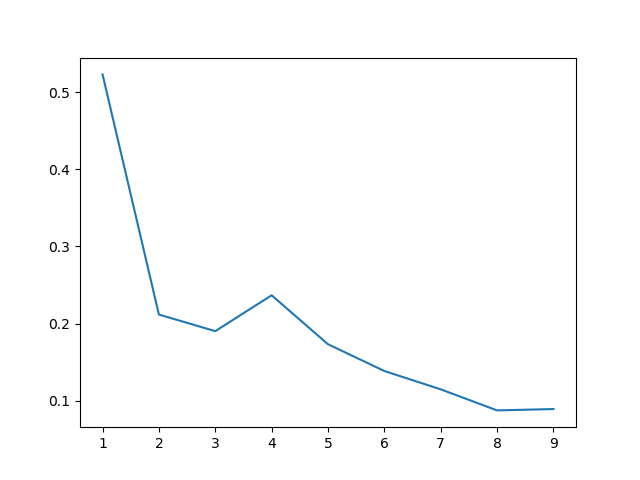

In [136]:
x = list(range(1, 10))
y = [acf(fitnesses, step) for step in  x]
plt.plot(x, y)

# Correlation length

High correlation length indicates smooth landscape, whereas low indicates more rugged structure.

In [144]:
def cl(f):
    return -1/np.log(acf(f, 1))

In [145]:
cl(fitnesses)

1.5437209943404842